In [237]:
# import the necessary libraries
import numpy as np
import pandas as pd

In [238]:
# generating a synthetic dataset
np.random.seed(42)
X = np.random.uniform(-10, 10, 200)
y = 0.25 * X + 0.7 * X ** 2 + np.random.normal(0, 5, X.shape[0])

In [239]:
df = pd.DataFrame({'feature' : X,
 'output' : y})
df

,feature,output
0,-2.509198,0.379828
1,9.014286,60.294988
2,4.639879,17.695265
3,1.973170,-0.353086
4,-6.879627,40.739455
...,...,...
195,-3.015809,-1.424700
196,4.519114,11.833229
197,7.942205,45.073352
198,7.741728,45.444022


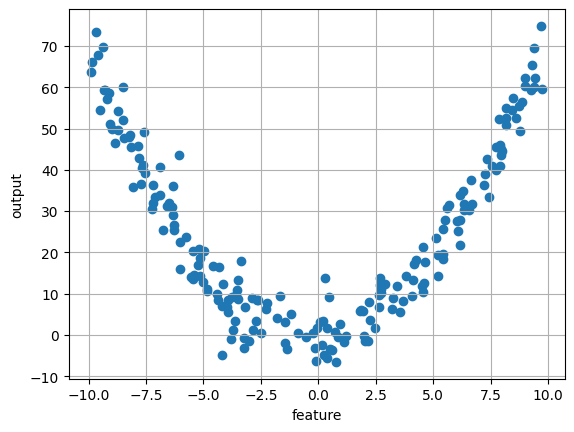

In [240]:
# visualizing the data
import matplotlib.pyplot as plt
plt.scatter(df['feature'], df['output'])
plt.xlabel('feature')
plt.ylabel('output')
plt.grid()
plt.show()

In [241]:
# checking for null values
df.isnull().sum()

feature    0
output     0
dtype: int64

In [242]:
# checking for duplicated values
df.duplicated().sum()

0

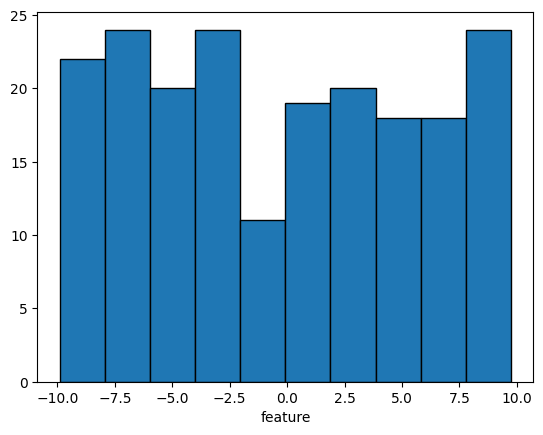

In [243]:
plt.hist(df['feature'], edgecolor = "black")
plt.xlabel('feature')
plt.show()

**The column show uniform distribution**

In [244]:
df.describe()

,feature,output
count,200.000000,200.000000
mean,-0.319875,24.556049
std,5.897829,21.300534
min,-9.889558,-6.549212
25%,-5.428352,7.007287
50%,-0.110275,18.485663
75%,5.137192,41.520334
max,9.737739,74.856359


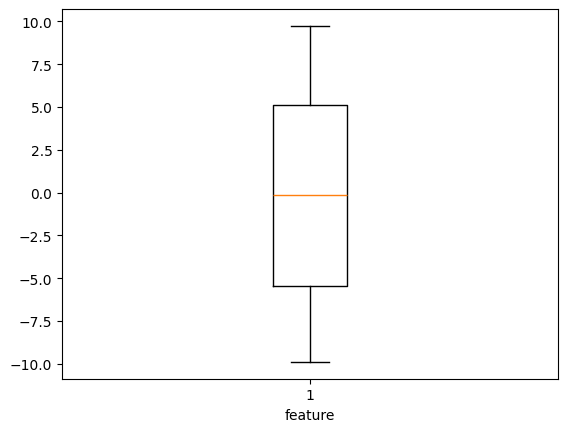

In [245]:
# checking for outliers
plt.boxplot(df['feature'])
plt.xlabel('feature')
plt.show()

**No outliers is present in the dataset**

In [246]:
# perform train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
X_train

array([-7.68261881,  7.9422052 ,  3.68466053, -0.87860032, -3.6399305 ,
       -3.01580851, -9.07099175, -4.1754172 , -3.9824338 ,  4.59212357,
        2.66807513, -5.4700845 , -6.88010959,  6.36029532, -6.26859882,
        6.30922857,  9.2489459 , -9.49161747,  0.24186117,  0.45465659,
        1.81785886, -1.44917963, -6.58951753,  6.64885282,  6.16794696,
        0.78684484, -9.31222958, -5.16295418, -7.60811508,  0.37581243,
        5.50265647,  7.21461167,  2.67059422, -0.0964618 ,  7.85117997,
        6.16240759, -6.00652436,  9.43564165, -9.37141629, -6.77557425,
        4.63987884, -8.51910697, -3.76577848,  1.10401623,  7.94431516,
       -3.49633356,  2.64611661, -3.90772462, -8.13794464, -4.57301936,
       -4.15710703, -4.96435408,  2.72820823,  8.97771075,  9.39819704,
       -3.21940418,  4.56432697, -8.83832776,  0.28468877,  6.1488031 ,
       -6.87962719, -8.69896814, -0.05502988, -9.26226105, -8.4604018 ,
       -4.30319011, -9.58831011,  6.57475018,  8.59395305,  2.19

In [248]:
len(X_train)

160

In [249]:
len(X_test)

40

In [250]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

In [251]:
X_train

array([[-1.2447074 ],
       [ 1.41234564],
       [ 0.68833608],
       [-0.08766153],
       [-0.55723487],
       [-0.45110086],
       [-1.48080481],
       [-0.64829615],
       [-0.61547869],
       [ 0.84265317],
       [ 0.51546237],
       [-0.86845861],
       [-1.10823805],
       [ 1.14333663],
       [-1.00424862],
       [ 1.13465256],
       [ 1.63456122],
       [-1.55233361],
       [ 0.10287665],
       [ 0.13906322],
       [ 0.37088028],
       [-0.18469043],
       [-1.05882191],
       [ 1.19240679],
       [ 1.11062715],
       [ 0.19555293],
       [-1.5218281 ],
       [-0.81623009],
       [-1.23203779],
       [ 0.12565551],
       [ 0.9974923 ],
       [ 1.28861595],
       [ 0.51589074],
       [ 0.04534371],
       [ 1.3968665 ],
       [ 1.10968517],
       [-0.95968199],
       [ 1.66630945],
       [-1.531893  ],
       [-1.09046147],
       [ 0.85077411],
       [-1.38695498],
       [-0.57863574],
       [ 0.24948897],
       [ 1.41270445],
       [-0

In [252]:
# for transforming the input features into polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [254]:
def polynomial_regression(X_train, X_test, y_train, degree):
    # transform the X_train and X_test into polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.transform(X_test)

    # fit the regression model and make prediction
    lr = LinearRegression()
    lr.fit(X_train_trans, y_train)
    y_pred = lr.predict(X_test_trans)

    # evaluate the model
    r2 = r2_score(y_test, y_pred)

    return r2

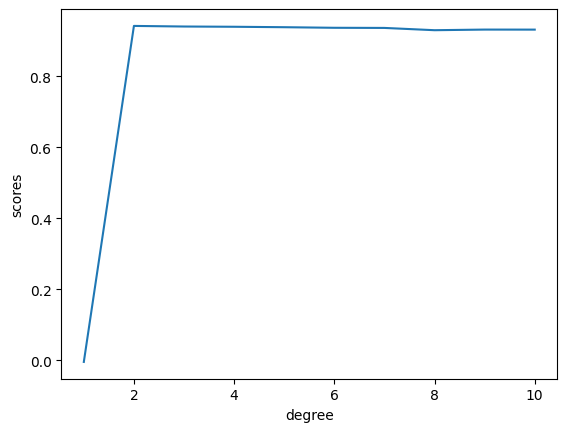

In [255]:
degree = [i for i in range(1, 11)]
scores = []

for deg in degree:
    scores.append(polynomial_regression(X_train, X_test, y_train, deg))

plt.plot(degree, scores)
plt.xlabel("degree")
plt.ylabel("scores")
plt.show()

In [256]:
scores

[-0.004969524906821343,
 0.9422232579424841,
 0.9405431647367174,
 0.939843314836363,
 0.938602152576881,
 0.9369624971589916,
 0.9365739102063732,
 0.9301490060345615,
 0.9319087842053878,
 0.9317969847312433]

**The Optimal degree is 2**

In [257]:
# transform the X_train and X_test into polynomial features
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# fit the regression model and make prediction
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

# evaluate the model
r2 = r2_score(y_test, y_pred)

In [258]:
y_pred

array([6.57302960e-02, 2.66837104e+01, 3.95630946e+00, 1.81037566e+01,
       6.61119834e+01, 4.11731532e+01, 6.98343250e+01, 9.99047442e+00,
       6.85430217e+00, 8.46028036e+00, 3.45662960e+01, 5.34549132e+01,
       3.37450341e+01, 4.97059831e+00, 3.03080738e+01, 3.09000192e+00,
       4.57029300e+01, 3.37862611e+01, 7.23986214e+00, 4.89259391e+01,
       1.95165274e+01, 9.84285324e+00, 5.45011137e+01, 1.49075696e+00,
       8.41388627e-01, 2.97741024e+00, 9.14670573e+00, 2.75925502e+01,
       1.18807268e+00, 3.88523932e+01, 1.34870375e+01, 1.02204461e+00,
       5.27642338e+01, 1.61909509e+01, 4.94937510e+01, 4.93284922e+01,
       7.95003752e+00, 1.28714570e+01, 4.52954471e+01, 2.24050865e+01])

In [259]:
print(f"R2 Score : {r2}")

R2 Score : 0.9422232579424841


In [260]:
X_test

array([[ 0.04064577],
       [-1.01501486],
       [ 0.42751452],
       [-0.83056472],
       [-1.61514108],
       [ 1.32510942],
       [ 1.71768206],
       [ 0.66565551],
       [ 0.55548963],
       [ 0.61449641],
       [-1.15949312],
       [ 1.50615847],
       [ 1.20213334],
       [-0.41962007],
       [ 1.14064106],
       [-0.32347323],
       [-1.33781688],
       [-1.14598869],
       [-0.51337965],
       [-1.38523406],
       [-0.86356316],
       [-0.60403773],
       [-1.4637031 ],
       [ 0.27015516],
       [ 0.20695956],
       [-0.31686855],
       [-0.58111428],
       [ 1.08953929],
       [-0.18616388],
       [-1.23111569],
       [ 0.76941597],
       [-0.16971214],
       [ 1.49656956],
       [ 0.8406159 ],
       [ 1.45028666],
       [ 1.44790792],
       [-0.53955117],
       [ 0.75222828],
       [-1.33170425],
       [ 0.98435577]])

**Plotting the data**

In [261]:
# if we will not sort the data then zigzag pattern will form, so we are sorting it
X_test_sort = X_test.flatten()
sort_idx = X_test_sort.argsort()
X_test_sort = X_test_sort[sort_idx]

In [262]:
X_test_sort.shape[0]

40

In [263]:
y_pred_sort = y_pred[sort_idx]

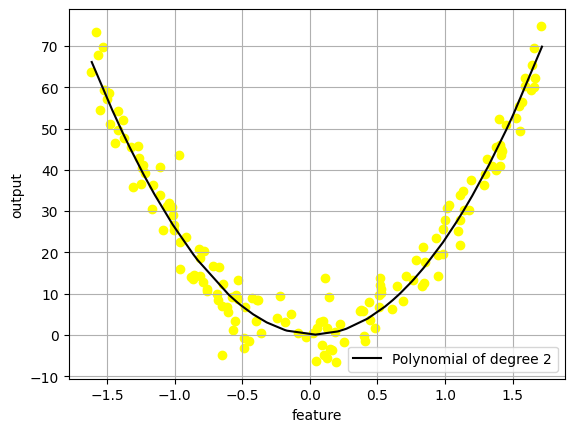

In [264]:
plt.scatter(X_train, y_train, color = "yellow")
plt.plot(X_test_sort, y_pred_sort, color = 'black', label = 'Polynomial of degree 2')
plt.xlabel('feature')
plt.ylabel('output')
plt.grid()
plt.legend()
plt.show()

In [265]:
# if the value of degree is increased then overfitting will occur
# for ex take degree = 23
# transform the X_train and X_test into polynomial features
poly = PolynomialFeatures(degree=23)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# fit the regression model and make prediction
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

# evaluate the model
r2 = r2_score(y_test, y_pred)

In [266]:
# if we will not sort the data then zigzag pattern will form, so we are sorting it
X_test_sort = X_test.flatten()
sort_idx = X_test_sort.argsort()
X_test_sort = X_test_sort[sort_idx]

y_pred_sort = y_pred[sort_idx]

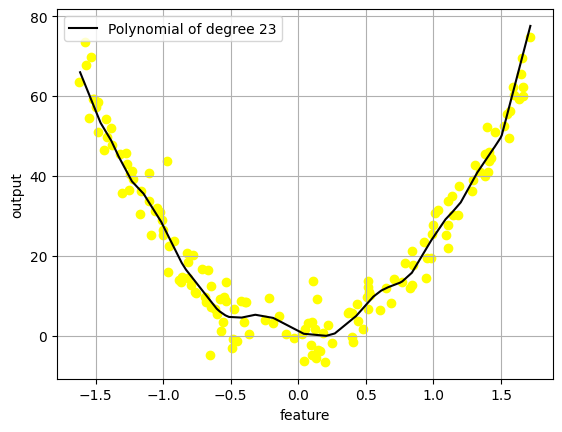

In [267]:
plt.scatter(X_train, y_train, color = "yellow")
plt.plot(X_test_sort, y_pred_sort, color = 'black', label = 'Polynomial of degree 23')
plt.xlabel('feature')
plt.ylabel('output')
plt.grid()
plt.legend()
plt.show()

In [268]:
print(f"R2 Score for degree 23 : {r2}")

R2 Score for degree 23 : 0.9200776347645571


**See the model is trying to overfit it is capturing even the small changes happening in the data, as the value of degree is reduced then it will try to underfit**

In [269]:
# In case of non linear data, we can't find best fit line
# transform the X_train and X_test into polynomial features
poly = PolynomialFeatures(degree=1)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# fit the regression model and make prediction
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

# evaluate the model
r2 = r2_score(y_test, y_pred)

In [270]:
# if we will not sort the data then zigzag pattern will form, so we are sorting it
X_test_sort = X_test.flatten()
sort_idx = X_test_sort.argsort()
X_test_sort = X_test_sort[sort_idx]

y_pred_sort = y_pred[sort_idx]

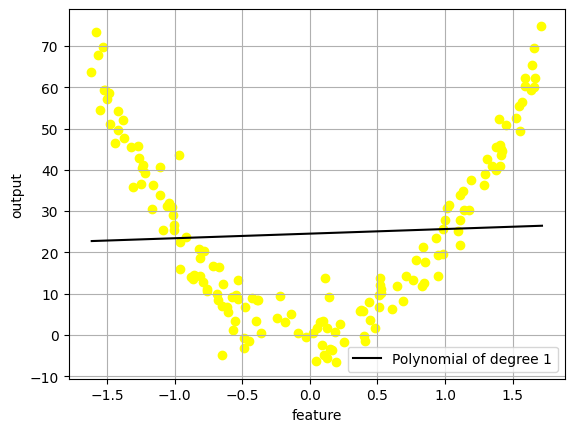

In [271]:
plt.scatter(X_train, y_train, color = "yellow")
plt.plot(X_test_sort, y_pred_sort, color = 'black', label = 'Polynomial of degree 1')
plt.xlabel('feature')
plt.ylabel('output')
plt.grid()
plt.legend()
plt.show()

In [272]:
print(f"R2 Score for degree 1 : {r2}")

R2 Score for degree 1 : -0.004969524906821343
